In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 
from keras import Input
from keras.utils.np_utils import to_categorical

In [3]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]] # clusters have their own centers 
X,y = datasets.make_blobs(
    n_samples=n_pts, 
    random_state=123, 
    centers=centers, 
    cluster_std=0.4
)

print(X)
print(y)

[[ 0.95219249  1.39076863]
 [ 1.65952714  1.68618744]
 [-0.473863    0.05839169]
 [-1.41959667  0.96995176]
 [ 1.05997353 -0.78014296]
 [-1.60724319 -1.18447497]
 [-0.82564969 -1.1275828 ]
 [-0.11680167 -0.0467727 ]
 [ 0.72626083 -0.10110012]
 [ 0.42796744 -0.36373081]
 [ 1.08583443  0.83913611]
 [ 1.38965297 -0.93588251]
 [-1.58604649 -0.85462178]
 [-0.44909701  0.94272961]
 [ 1.40572155 -1.68359671]
 [-0.71461074 -0.0609578 ]
 [ 0.63020037  0.13222531]
 [ 0.74338976  0.0234151 ]
 [ 1.02112227  0.35169921]
 [-1.40786203  1.06717692]
 [ 0.73537974  0.62811535]
 [-0.53991778  0.49305918]
 [ 1.16554523  1.01893675]
 [-0.19294613  0.43191854]
 [-1.16056577 -0.73060349]
 [ 0.67184979  0.7509346 ]
 [-0.25482897 -0.6659765 ]
 [-0.8742912   0.46949382]
 [ 0.57943063  0.35688003]
 [ 1.16644953 -1.05312047]
 [ 0.82413112  1.43528819]
 [-1.15029996 -1.55188999]
 [-1.50155227  0.7448994 ]
 [ 0.27281391  0.11862263]
 [-1.03947388 -1.08599322]
 [-0.59490438  1.11149634]
 [-0.48077467 -0.18831422]
 

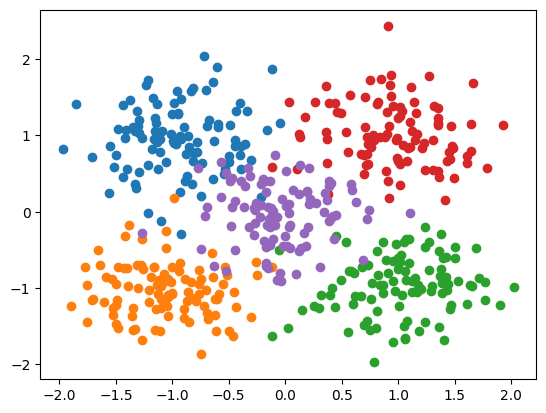

In [5]:
# displaying points by clusters (0, 1, 2, 3, 4)
plt.scatter(X[y == 0, 0],  X[y == 0, 1])
plt.scatter(X[y == 1, 0],  X[y == 1, 1])
plt.scatter(X[y == 2, 0],  X[y == 2, 1])
plt.scatter(X[y == 3, 0],  X[y == 3, 1])
plt.scatter(X[y == 4, 0],  X[y == 4, 1]);

In [13]:
# we see that 0,1,2,3,4 are labels of points in each clusters, 
# but 4>3>2>1>0 so they some how still have priorities in a machine learning algorithm
# they should not relate to each other 
# that's why there's a process called one hot encoding
# means 0 --> [1,0,0,0,0]
# 1 --> [0,1,0,0,0]
# and so on.

# one hot encoding
y_cates = to_categorical(y)
print(y_cates)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [14]:
model = Sequential()

model.add(Input(shape=(2,))) # input layer (x,y coordinate)
model.add(Dense(units=5, activation='softmax')) # output layer with 5 labels, for mutilclass, must use softmax 
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='categorical_crossentropy', # for multiclass, must use categorical  
    metrics=['accuracy']
)

In [15]:
model_his = model.fit(
    x=X, y=y_cates, 
    verbose= 1,
    batch_size= 50,
    epochs=100, 
    shuffle='true'
)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 1.6903 - accuracy: 0.0980
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 1.5345 - accuracy: 0.2640
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 1.3995 - accuracy: 0.3100
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 1.2811 - accuracy: 0.3820
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1780 - accuracy: 0.4540
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0898 - accuracy: 0.7340
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0139 - accuracy: 0.7780
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9471 - accuracy: 0.7940
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8908 - accuracy: 0.8140
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8401 - accuracy: 0.8240
Epoch 11/

In [36]:
# for multi classes
def predict_classes (points, model):
    pred = model.predict(points) 
    return np.argmax(pred,axis=1) 

def plot_decision_boundary(X, model):
    # 2d grid needs x and y coordinates
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)

    xx_flatten = xx.ravel()
    yy_flatten = yy.ravel()
    
    grid_points = np.c_[xx_flatten, yy_flatten] #  concatenation
    pred = predict_classes(grid_points, model)
    zz = pred.reshape(xx.shape)
    plt.contourf(xx, yy, zz)

79/79 [==============================] - 0s 960us/step


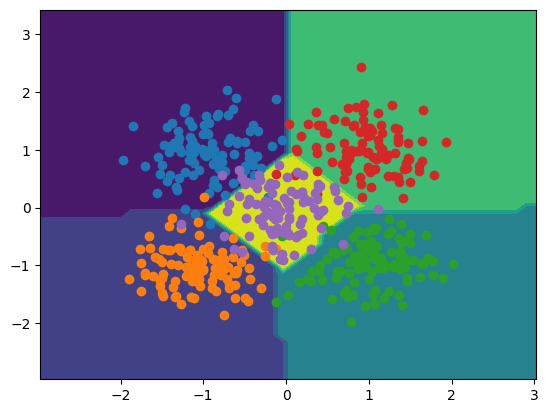

In [37]:
plot_decision_boundary(X, model)

plt.scatter(X[y == 0, 0],  X[y == 0, 1])
plt.scatter(X[y == 1, 0],  X[y == 1, 1])
plt.scatter(X[y == 2, 0],  X[y == 2, 1])
plt.scatter(X[y == 3, 0],  X[y == 3, 1])
plt.scatter(X[y == 4, 0],  X[y == 4, 1]);

1/1 [==============================] - 0s 41ms/step
prediction is:  [4]


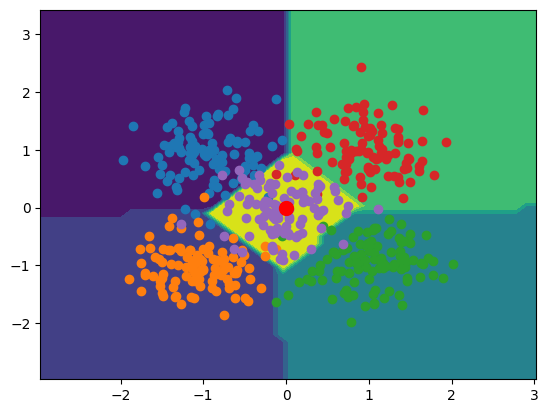

In [38]:
plot_decision_boundary(X, model)

plt.scatter(X[y == 0, 0],  X[y == 0, 1])
plt.scatter(X[y == 1, 0],  X[y == 1, 1])
plt.scatter(X[y == 2, 0],  X[y == 2, 1])
plt.scatter(X[y == 3, 0],  X[y == 3, 1])
plt.scatter(X[y == 4, 0],  X[y == 4, 1]);
x = 0
y = 0
a_point = [x, y]
pred = predict_classes(np.array([a_point]), model)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print('prediction is: ', pred)